# Google 1gram Data Visualizations

**Alex John Quijano**

*Applied Mathematics, University of California Merced*

## Preamble.

In [1]:
import  time
print( 'Last updated: %s' %time.strftime('%d/%m/%Y') )

Last updated: 20/10/2020


In [2]:
import os
import math
import numpy as np
import pandas as pd
import wf2020 as wf20 # module for the wright-fisher inspired model
import languagePlot as lp # module for plotting utilities
import languageCompute as lc # module for time-series computations such as the cosine-similarity matrices and the BC
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mp
font = {'size':22}
mp.rc('font',**font)
import seaborn as sns
import googleNgram as gn
import pickle as pkl

# folder for figures
try:
    os.mkdir('figures/')
except:
    pass
try:
    os.mkdir('figures/google-ngram-visualizations')
except:
    pass

# directory for the precomputed values and simulations
precomp_gn_dir = 'save/google-1gram-computations'

## 1. Load Google Ngram Processed Datasets.

***Code Block: Loading Google Ngram Data and printing information.***

In [3]:
n = '1'
l_codes = ['eng','eng-us','eng-gb','eng-fiction','chi-sim','fre','ger','ita','heb','rus','spa']
languages = ['English','American English','British English','English Fiction',
             'Simplified Chinese','French','German','Italian','Hebrew','Russian','Spanish']
l_plot_grids = {'eng':(0,0),'eng-us':(0,1),'eng-gb':(0,2),
                'eng-fiction':(1,0),'chi-sim':(1,1),'fre':(1,2),
               'ger':(2,0),'ita':(2,1),'heb':(2,2),
                'rus':(3,0),'spa':(3,1)}
l_labels = {j:languages[i] for i, j in enumerate(l_codes)}
colors_accent = cm.get_cmap('tab20')
l_colors = {j:colors_accent(i) for i, j in enumerate(l_codes)}

In [4]:
# precomputed data and print data summary table
L_summary = pd.read_csv(precomp_gn_dir+'/data-summary.csv',index_col=0)
L = {}
for l in l_codes:
    D = gn.read(n,l,ignore_case=True,restriction=True,annotation=False)
    for k in D.keys():
        try:
             D[k] = D[k].T.sort_index().T
        except:
             pass
    L[l] = D
    
L_summary

# actual code
# L = {}
# L_summary = {'language':[],'c (data)':[],'beta (data)':[],'c (data) / beta (data)':[],'T (data)':[],'min(r) (data)':[],'max(r) (data)':[]}
# for l in l_codes:
#     D = gn.read(n,l,ignore_case=True,restriction=True,annotation=False)
#     for k in D.keys():
#         try:
#             D[k] = D[k].T.sort_index().T
#         except:
#             pass
#     L[l] = D
#     size = D['rscore'].shape
#     L_summary['language'].append(l_labels[l])
#     L_summary['c (data)'].append(size[0])
#     L_summary['beta (data)'].append(int(np.sum(D['rscore'][1900])))
#     L_summary['c (data) / beta (data)'].append(size[0]/np.sum(D['rscore'][1900]))
#     L_summary['T (data)'].append(size[1])
#     L_summary['min(r) (data)'].append(int(np.min(np.min(D['rscore']))))
#     L_summary['max(r) (data)'].append(int(np.min(np.max(D['rscore']))))
# L_summary = pd.DataFrame(L_summary,index=l_codes)
# L_summary.sort_values(by='c (data)')

,language,c (data),beta (data),c (data) / beta (data),T (data),min(r) (data),max(r) (data)
eng,English,18737,2088730069,0.000009,109,580,99697894
eng-us,American English,16410,1802894507,0.000009,109,612,81890411
eng-gb,British English,4759,652318376,0.000007,109,884,18090596
eng-fiction,English Fiction,5651,188843546,0.000030,109,284,6424749
chi-sim,Simplified Chinese,180,947267,0.000190,109,1,1418
fre,French,12168,859870065,0.000014,109,269,10910785
ger,German,5871,359840835,0.000016,109,261,3596386
ita,Italian,4446,168812229,0.000026,109,386,3745641
heb,Hebrew,3000,20838695,0.000144,109,13,203957
rus,Russian,828,68919792,0.000012,109,665,1492799


***Code Block: English time-series example.***

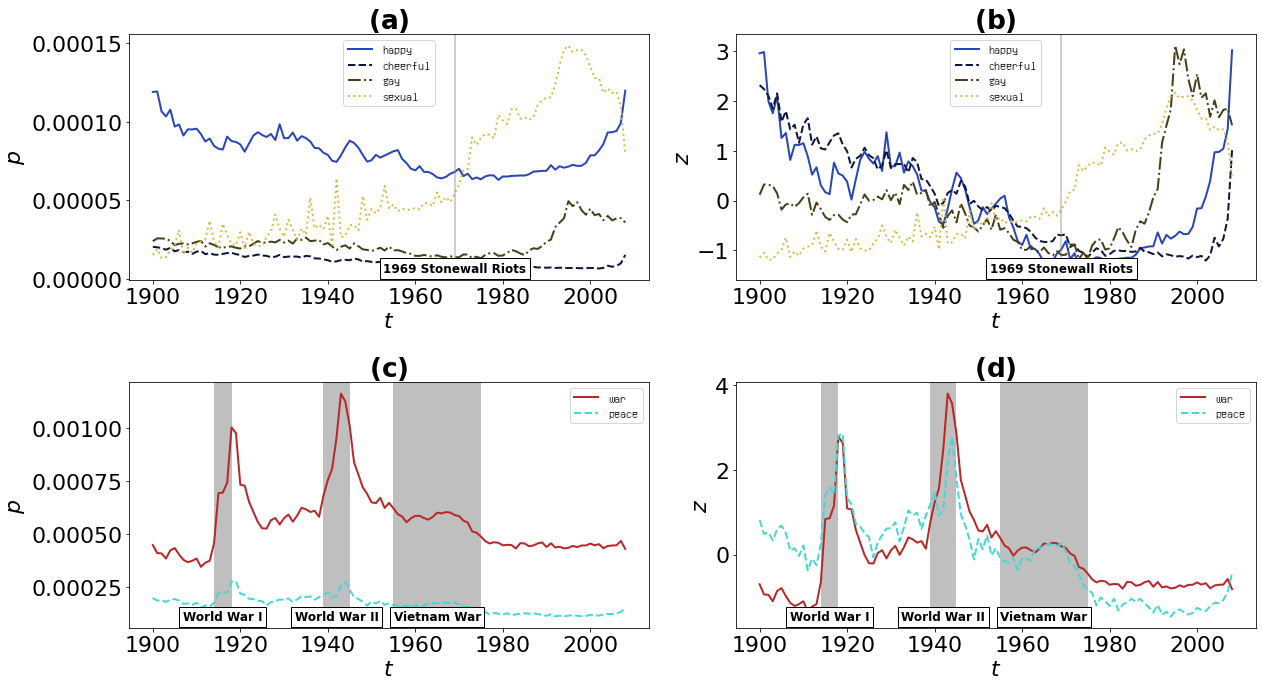

In [5]:
ap_hcgs = [[[1969]],
      ['1969 Stonewall Riots']]
ngrams_hcgs = ['happy','cheerful','gay','sexual']
ngrams_linestyles_hcgs = [':','--','-','-.']
ngrams_markerstyles_hcgs = ['o','s','p','^']

ap_wp = [[[1914,1918],[1939,1945],[1955,1975]],
         ['World War I','World War II','Vietnam War']]
ngrams_wp = ['war','peace']
ngrams_linestyles_wp = [':','--']
ngrams_markerstyles_wp = ['o','s']

# FIGURE: example zscore time-series using the motivating example words.
# The time-series is annotated by major historical and cultural events.
fig, ax = plt.subplots(2,2,figsize=(9*2,5*2))
lp.time_series_plot(data=L['eng']['pscore'].loc[ngrams_hcgs,:].T,
                    xlabel=r'$t$',ylabel=r'$p$',
                    title=r'$\mathbf{(a)}$',
                    color='#2845B9',
                    annotation=True,annotation_parameters=ap_hcgs,ax=ax[0,0])
lp.time_series_plot(data=L['eng']['pscore'].loc[ngrams_wp,:].T,
                    xlabel=r'$t$',ylabel=r'$p$',
                    title=r'$\mathbf{(c)}$',
                    color='#B92828',
                    annotation=True,annotation_parameters=ap_wp,ax=ax[1,0])
lp.time_series_plot(data=L['eng']['zscore'].loc[ngrams_hcgs,:].T,
                    xlabel=r'$t$',ylabel=r'$z$',
                    title=r'$\mathbf{(b)}$',
                    color='#2845B9',
                    annotation=True,annotation_parameters=ap_hcgs,ax=ax[0,1])
lp.time_series_plot(data=L['eng']['zscore'].loc[ngrams_wp,:].T,
                    xlabel=r'$t$',ylabel=r'$z$',
                    title=r'$\mathbf{(d)}$',
                    color='#B92828',
                    annotation=True,annotation_parameters=ap_wp,ax=ax[1,1])


plt.tight_layout()
plt.savefig('figures/google-ngram-visualizations/zts_pts_english_'+str('-'.join(ngrams_hcgs+ngrams_wp))+'_wa.png')
plt.show()

In [6]:
selected_time_series = np.random.choice(L['eng']['rscore'].index,4)
selected_time_point = [[[1980]],[r'$t = 1980$']]

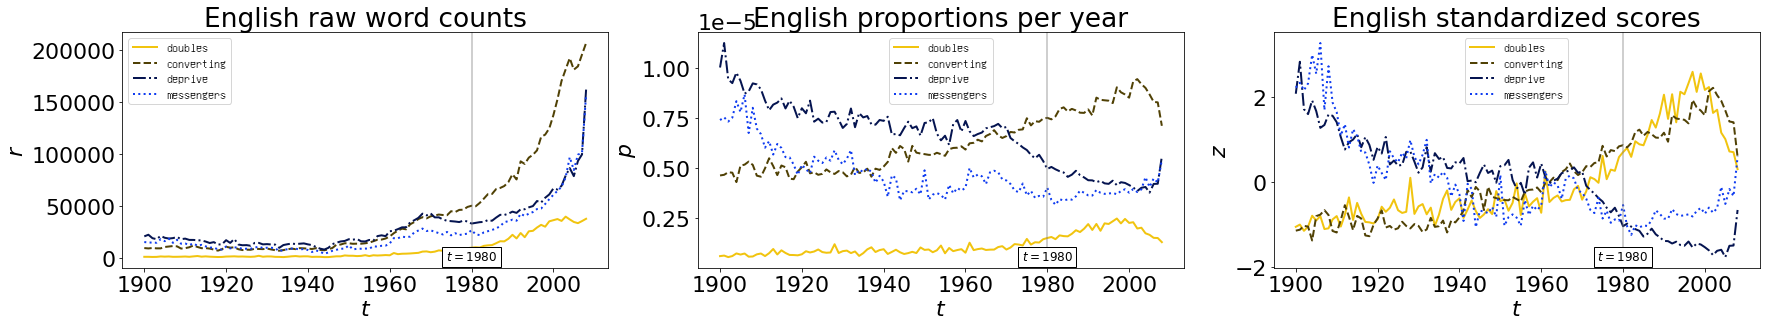

In [7]:
# FIGURE: selected time series
fig, ax = plt.subplots(1,3,figsize=(25,5))
lp.time_series_plot(data=L['eng']['rscore'].loc[selected_time_series,:].T,xlabel=r'$t$',ylabel=r'$r$',title='English raw word counts',color='#F1C40F',
               annotation=True,annotation_parameters=selected_time_point,ax=ax[0])
lp.time_series_plot(data=L['eng']['pscore'].loc[selected_time_series,:].T,xlabel=r'$t$',ylabel=r'$p$',title='English proportions per year',color='#F1C40F',
               annotation=True,annotation_parameters=selected_time_point,ax=ax[1])
lp.time_series_plot(data=L['eng']['zscore'].loc[selected_time_series,:].T,xlabel=r'$t$',ylabel=r'$z$',title='English standardized scores',color='#F1C40F',
               annotation=True,annotation_parameters=selected_time_point,ax=ax[2])
plt.tight_layout()
plt.savefig('figures/google-ngram-visualizations/multiple-time-series_eng_random-selected-time-series_1x3.png')
plt.show()

## 2. Curve Fitting for the Corpus Size.

***Code Block: Set up the function to fit into the data. The curve fitting method used is the least-squares.***

In [6]:
# curve_fit uses a least-squares optimization method (default method='lm' means unconstrained least squares method)
#from scipy.optimize import curve_fit 

# corpus size function 
# the original function in wf2020 has an integer output because of the ceiling function 
# but for here it's a float type because the curve fitting functions require floats or non-integer number type.)
def corpus_size(t,alpha,beta):
    return np.ceil(beta*np.exp(alpha*t))

In [7]:
# precomputed perform the curve fitting, RAM store data and print data summary table
L_corpusSize_fits = pd.read_csv(precomp_gn_dir+'/corpus-size-fits.csv',index_col=0)
L_corpusSize_fits

# actual code
# L_corpusSize_fits = {'language':[],'alpha (fit)':[],'beta (fit)':[],'beta (data)':[],'c (data)':[],'c (data) / beta (fit)':[],'c (data) / beta (data)':[]}

# for l in l_codes:
#     # time vector as indices
#     time_vect = np.array(range(0,L[l]['rscore'].shape[1]))
#     # corpus size data
#     N = np.sum(L[l]['rscore']).values
#     # simple curve fitting with initial guesses alpha=0.01 and beta=from_data
#     pars, cov = curve_fit(f=corpus_size, xdata=time_vect, ydata=N, p0=[0.10,int(np.sum(L[l]['rscore'][1900]))])
#     L_corpusSize_fits['language'].append(l_labels[l])
#     L_corpusSize_fits['alpha (fit)'].append(round(pars[0],4))
#     L_corpusSize_fits['beta (fit)'].append(int(pars[1]))
#     L_corpusSize_fits['beta (data)'].append(int(np.sum(L[l]['rscore'][1900])))
#     L_corpusSize_fits['c (data)'].append(L[l]['rscore'].shape[0])
#     L_corpusSize_fits['c (data) / beta (fit)'].append(L[l]['rscore'].shape[0]/int(pars[1]))
#     L_corpusSize_fits['c (data) / beta (data)'].append(L[l]['rscore'].shape[0]/int(np.sum(L[l]['rscore'][1900])))
# L_corpusSize_fits = pd.DataFrame(L_corpusSize_fits,index=l_codes)
# L_corpusSize_fits.sort_values(by=['alpha (fit)'])

,language,alpha (fit),beta (fit),beta (data),c (data),c (data) / beta (fit),c (data) / beta (data)
eng,English,0.0411,274894466,2088730069,18737,0.000068,0.000009
eng-us,American English,0.0430,161286162,1802894507,16410,0.000102,0.000009
eng-gb,British English,0.0363,73182636,652318376,4759,0.000065,0.000007
eng-fiction,English Fiction,0.1032,93742,188843546,5651,0.060282,0.000030
chi-sim,Simplified Chinese,0.0484,4115128,947267,180,0.000044,0.000190
fre,French,0.0146,331407983,859870065,12168,0.000037,0.000014
ger,German,0.0177,182111243,359840835,5871,0.000032,0.000016
ita,Italian,0.0239,73867174,168812229,4446,0.000060,0.000026
heb,Hebrew,0.0272,13864938,20838695,3000,0.000216,0.000144
rus,Russian,0.0183,109957267,68919792,828,0.000008,0.000012


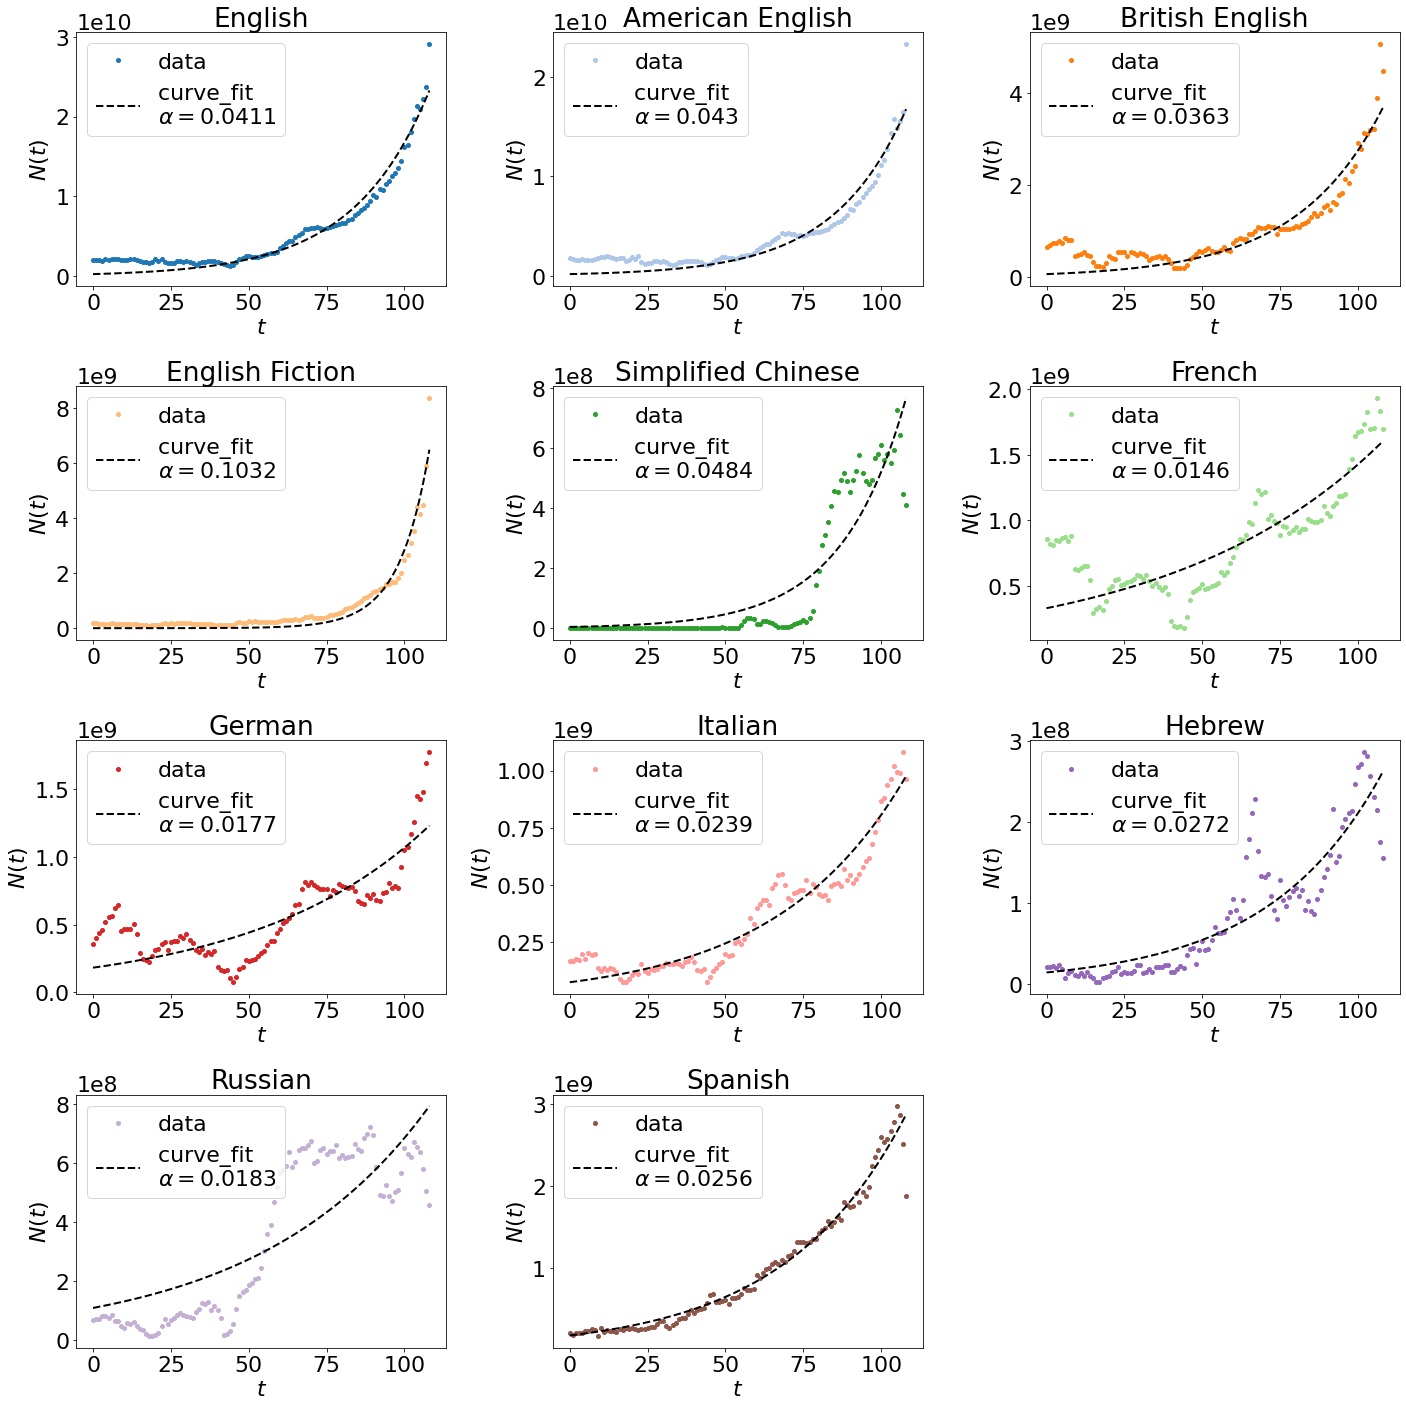

In [12]:
# FIGURE: visualization of the corpus size fitted function into the actual data
fig, ax = plt.subplots(4,3,figsize=(20,20))
for l_i, l in enumerate(l_codes):
    time_vect = np.array(range(0,L[l]['rscore'].shape[1]))
    alpha_fit = L_corpusSize_fits['alpha (fit)'][l]
    beta_fit = L_corpusSize_fits['beta (fit)'][l]
    N_data = np.sum(L[l]['rscore']).values
    ax[l_plot_grids[l]].plot(time_vect,N_data,'.',
                             markersize=8,color=l_colors[l],label='data')
    ax[l_plot_grids[l]].plot(time_vect,corpus_size(time_vect,alpha_fit,beta_fit),
                             linewidth=2,linestyle='--',color='black',
                             label='curve_fit \n'+r'$\alpha='+str(alpha_fit)+'$')
    ax[l_plot_grids[l]].set_xlabel(r'$t$')
    ax[l_plot_grids[l]].set_ylabel(r'$N(t)$')
    ax[l_plot_grids[l]].set_title(l_labels[l])
    ax[l_plot_grids[l]].legend(loc=2)
ax[3,2].axis('off')
plt.tight_layout()
plt.savefig('figures/google-ngram-visualizations/corpus-size_data-curve-fit_4x3.png')
plt.show()

## 3. Curve Fitting for the Initial Zipf Distribution.

***Code Block: Set up the function to fit into the data. The curve fitting method used is the least-squares.***

In [8]:
# zipf probabilities (log-log transform) this is the function used to fit the data
def zipf_loglog(x,a,b):
    return (-1*a*x)+b

In [9]:
# perform the curve fitting, RAM store data and print data summary table
L_zipfParameter_fits = pd.read_csv(precomp_gn_dir+'/initial-zipf-fits.csv',index_col=0)
L_zipfParameter_fits

# actual code
# L_zipfParameter_fits = {'language':[],'c (data)':[],'a (optimal)':[],'intercept (optimal)':[],'E (data)':[],'E (theory)':[]}

# for l in l_codes:
#     initial_p = L[l]['pscore'][1900]
#     empirical_ranks = lc.return_ranks(initial_p)
#     er = np.array(list(empirical_ranks.values()),dtype=float)
#     er_keys = list(empirical_ranks.keys())
#     initial_p_sorted = np.array(list(initial_p.loc[er_keys].values),dtype=float)
    
#     # only fit the line using the highest rank up to the empirical expected rank
#     E_empirical = lc.zipf_E_data(er,initial_p_sorted)
#     E_empirical_round = int(np.floor(E_empirical))
#     E_index = np.where(er == E_empirical_round)[0][0]+1
#     start_index = 0
#     end_index = E_index
#     pars, cov = curve_fit(f=zipf_loglog, xdata=np.log(er[start_index:end_index]), ydata=np.log(initial_p_sorted[start_index:end_index]), p0=[1,0])

#     # theoretical Zipf expected value using the optimal Zipf paramter a and all existing ranks
#     ranks = range(1,L[l]['pscore'].shape[0]+1)
#     pmf, cdf = wf20.zipf(ranks,pars[0])
#     E_theory = wf20.zipf_E(ranks,pars[0]) #np.sum(np.divide(1,np.power(ranks,pars[0]-1)))/np.sum(np.divide(1,np.power(ranks,pars[0])))
    
#     L_zipfParameter_fits['language'].append(l_labels[l])
#     L_zipfParameter_fits['c (data)'].append(L[l]['pscore'].shape[0])
#     L_zipfParameter_fits['a (optimal)'].append(round(pars[0],4))
#     L_zipfParameter_fits['intercept (optimal)'].append(pars[1])
#     L_zipfParameter_fits['E (data)'].append(round(E_empirical,2))
#     L_zipfParameter_fits['E (theory)'].append(round(E_theory,2))
    
# L_zipfParameter_fits = pd.DataFrame(L_zipfParameter_fits,index=l_codes)
# L_zipfParameter_fits.sort_values(by=['a (optimal)'])

,language,c (data),a (optimal),intercept (optimal),E (data),E (theory)
eng,English,18737,0.9923,-2.339599,1219.73,1857.48
eng-us,American English,16410,1.0056,-2.250025,1129.22,1559.32
eng-gb,British English,4759,1.0388,-2.004164,446.18,457.06
eng-fiction,English Fiction,5651,1.0776,-1.736749,445.74,455.58
chi-sim,Simplified Chinese,180,0.8244,-2.122029,27.92,42.21
fre,French,12168,0.9969,-2.308975,954.15,1233.70
ger,German,5871,1.0317,-2.001860,549.97,563.91
ita,Italian,4446,0.9948,-2.118907,462.50,504.34
heb,Hebrew,3000,0.9771,-2.272429,293.16,376.28
rus,Russian,828,0.9151,-2.176063,112.13,140.24


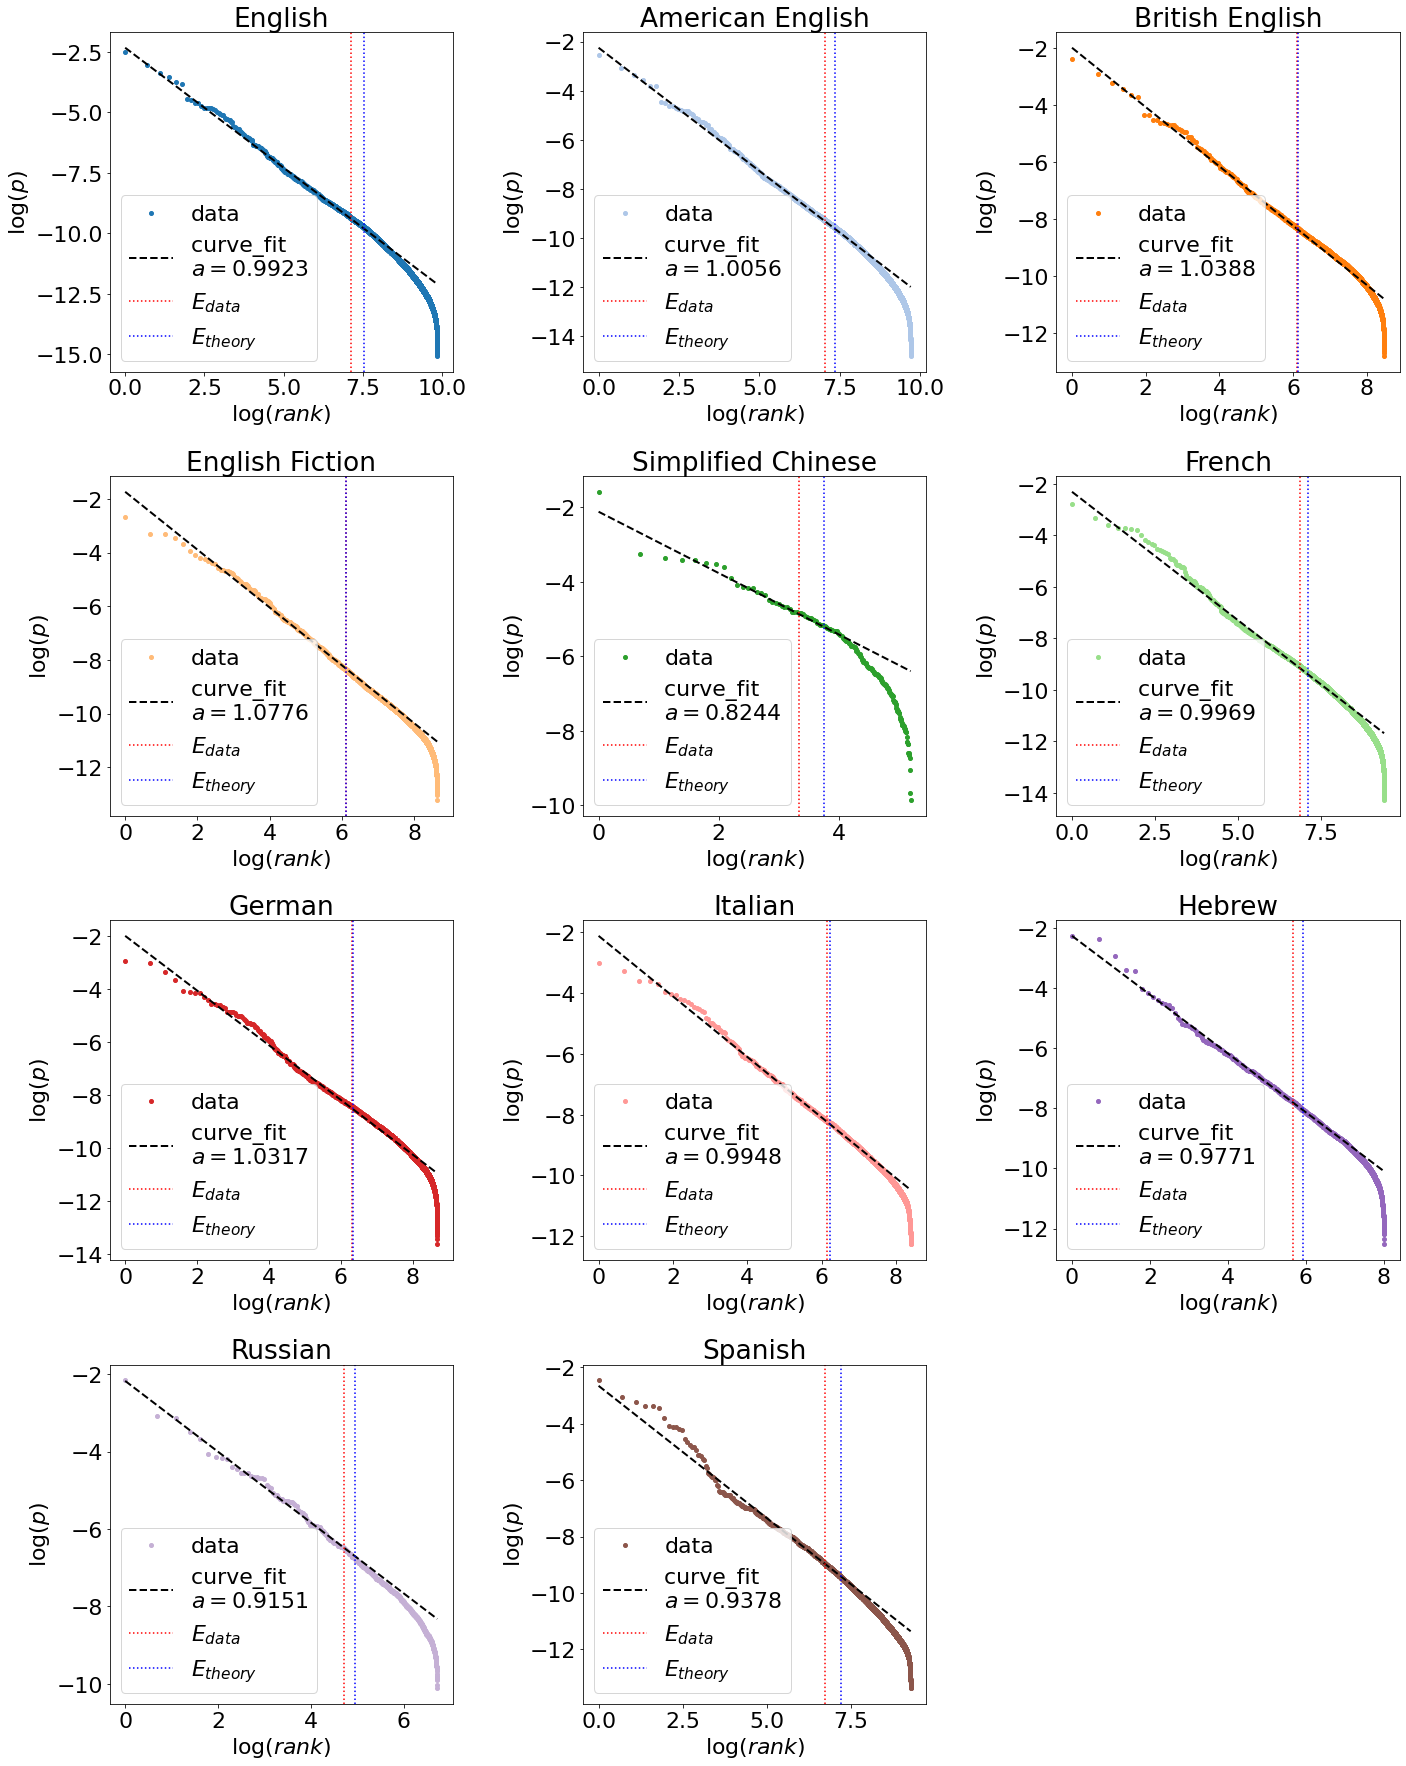

In [15]:
# FIGURE: visualization of the fitted function into the actual data
fig, ax = plt.subplots(4,3,figsize=(20,25))
for l in l_codes:
    initial_p = L[l]['pscore'][1900]
    empirical_ranks = lc.return_ranks(initial_p)
    er = np.array(list(empirical_ranks.values()),dtype=float)
    er_keys = list(empirical_ranks.keys())
    initial_p_sorted = np.array(list(initial_p.loc[er_keys].values),dtype=float)
    
    a_fit = L_zipfParameter_fits['a (optimal)'][l]
    b_fit = L_zipfParameter_fits['intercept (optimal)'][l]
    
    ax[l_plot_grids[l]].plot(np.log(er),np.log(initial_p_sorted),'.',
                             markersize=8,color=l_colors[l],label='data')
    ax[l_plot_grids[l]].plot(np.log(er),zipf_loglog(np.log(er),a_fit,b_fit),
                             linewidth=2,linestyle='--',color='black',
                             label='curve_fit \n'+r'$a='+str(a_fit)+'$')
    ax[l_plot_grids[l]].axvline(np.log(L_zipfParameter_fits['E (data)'][l]),label=r'$E_{data}$',linestyle=':',color='red')
    ax[l_plot_grids[l]].axvline(np.log(L_zipfParameter_fits['E (theory)'][l]),label=r'$E_{theory}$',linestyle=':',color='blue')
    ax[l_plot_grids[l]].set_xlabel(r'$\log{(rank)}$')
    ax[l_plot_grids[l]].set_ylabel(r'$\log{(p)}$')
    ax[l_plot_grids[l]].set_title(l_labels[l])
    ax[l_plot_grids[l]].legend(loc=3)
ax[3,2].axis('off')
plt.tight_layout()
plt.savefig('figures/google-ngram-visualizations/initial-zipf_data-curve-fit_4x3.png')
plt.show()

## 4. Bimodality Coefficients.

In [10]:
# precomputed bc values
l = 'eng'
dtype = 'zscore'
Z = L[l][dtype]
pcs = pkl.load(open(precomp_gn_dir+'/pcs_'+l+'.pkl','rb'))
BC = pkl.load(open(precomp_gn_dir+'/bc_'+l+'.pkl','rb'))

# actual code
# pcs = lc.pairwise_cosine_similarity(Z)
# BC = lc.bimodality_coefficient(Z,pcs=True)

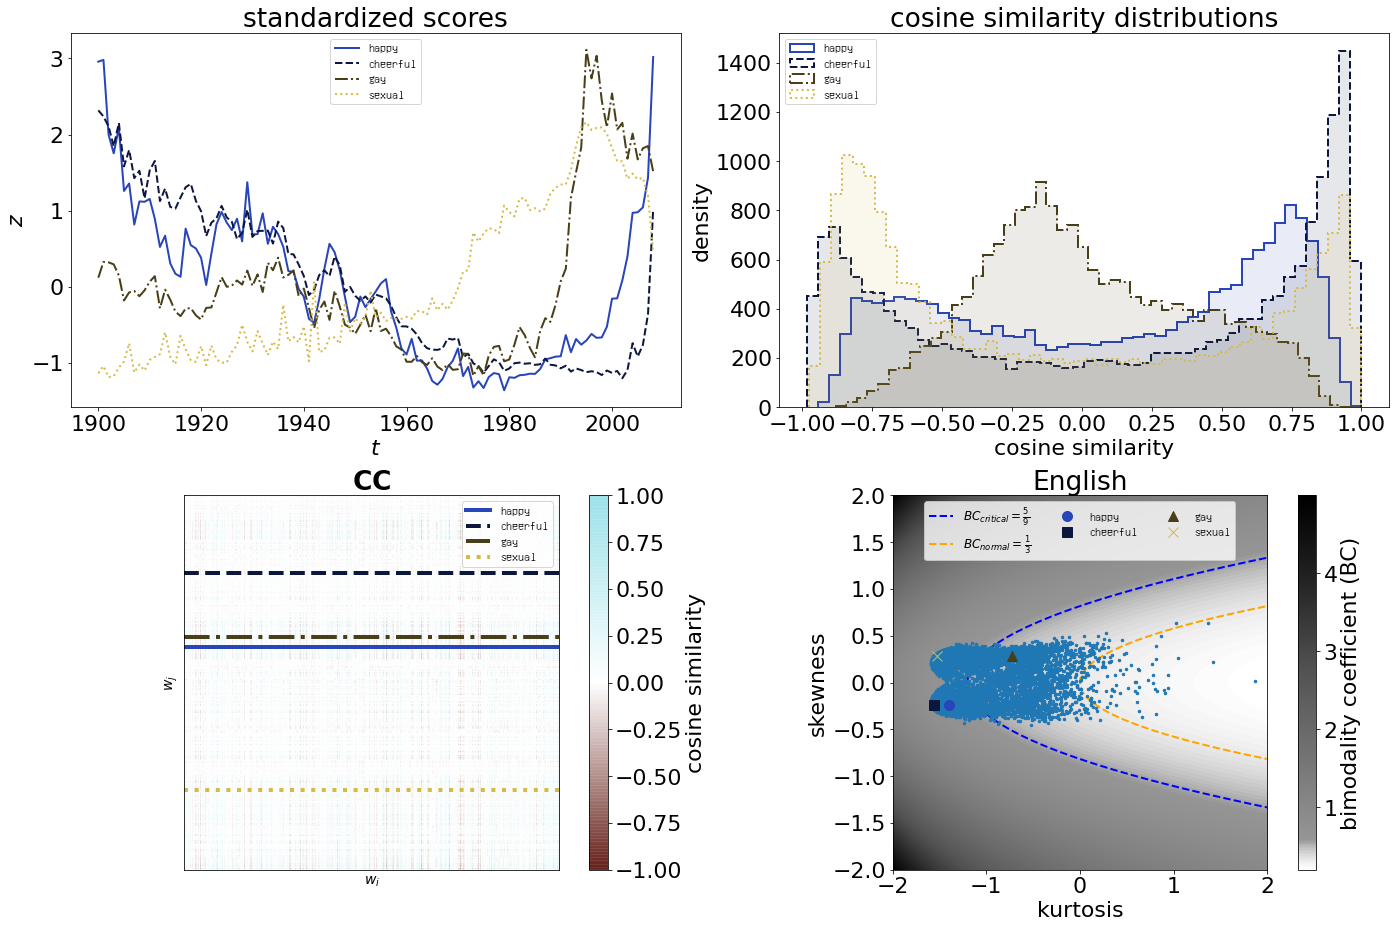

In [13]:
# FIGURE: visualising the pairwise cosine similiarty matrix and the BC space
selected_time_series = ngrams_hcgs
fig, ax = plt.subplots(2,2,figsize=(19.50,13))
lp.time_series_plot(data=Z.loc[selected_time_series,:].T,xlabel=r'$t$',ylabel=r'$z$',title='standardized scores',color='#2845B9',ax=ax[0,0])
lp.cosine_distribution_plot(data=pcs.loc[selected_time_series,:].T,color='#2845B9',title='cosine similarity distributions',ax=ax[0,1])
lp.pairwise_cosine_similarity_plot(data=pcs,data_selected=selected_time_series,title=r'$\mathbf{CC}$',color='#641E16',color_selected='#2845B9',ax=ax[1,0])
lp.bimodality_coefficient_plot(data=BC,data_selected=selected_time_series,title=l_labels['eng'],grid_size=BC['bc'].shape[0],color=mp.colors.to_hex(l_colors['eng']),color_selected='#2845B9',markersize_selected=10,legend=True,colorbar=True,ax=ax[1,1])
plt.tight_layout(pad=0.50)
plt.savefig('figures/google-ngram-visualizations/bc_pcs_csd_'+l+'_'+dtype+'_'+'-'.join(selected_time_series)+'_4x4.png')
plt.show()

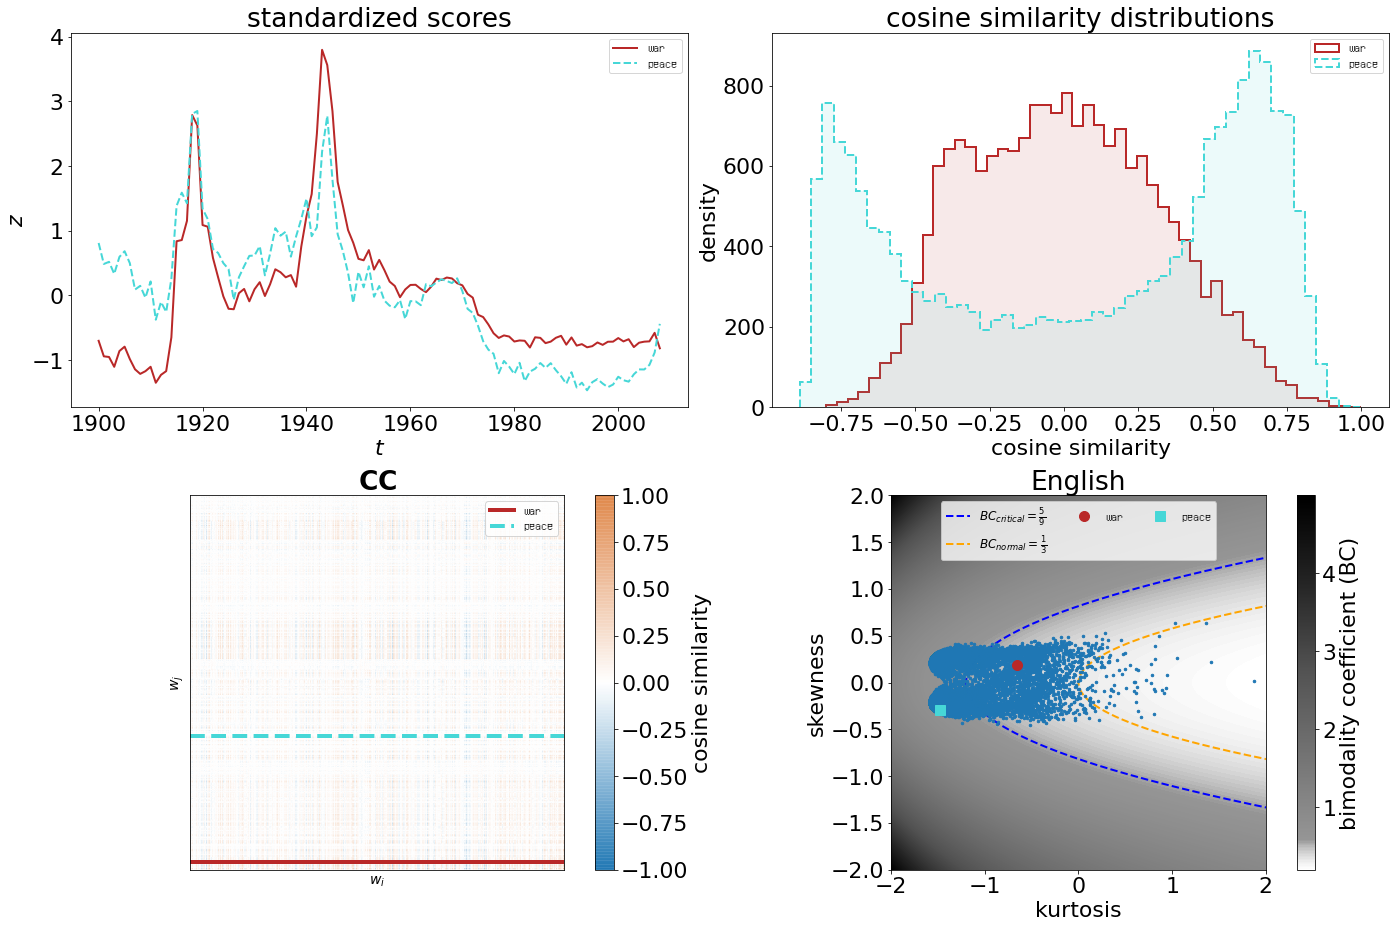

In [14]:
# FIGURE: visualising the pairwise cosine similiarty matrix and the BC space
selected_time_series = ngrams_wp
fig, ax = plt.subplots(2,2,figsize=(19.50,13))
lp.time_series_plot(data=Z.loc[selected_time_series,:].T,xlabel=r'$t$',ylabel=r'$z$',title='standardized scores',color='#B92828',ax=ax[0,0])
lp.cosine_distribution_plot(data=pcs.loc[selected_time_series,:].T,color='#B92828',title='cosine similarity distributions',ax=ax[0,1])
lp.pairwise_cosine_similarity_plot(data=pcs,data_selected=selected_time_series,title=r'$\mathbf{CC}$',color=mp.colors.to_hex(l_colors['eng']),color_selected='#B92828',ax=ax[1,0])
lp.bimodality_coefficient_plot(data=BC,data_selected=selected_time_series,title=l_labels['eng'],grid_size=BC['bc'].shape[0],color=mp.colors.to_hex(l_colors['eng']),color_selected='#B92828',markersize_selected=10,legend=True,colorbar=True,ax=ax[1,1])
plt.tight_layout(pad=0.50)
plt.savefig('figures/google-ngram-visualizations/bc_pcs_csd_'+l+'_'+dtype+'_'+'-'.join(selected_time_series)+'_4x4.png')
plt.show()

In [11]:
l_BC = {}
for l in l_codes:
    # precomputed  bc
    BC = pkl.load(open(precomp_gn_dir+'/bc_'+l+'.pkl','rb'))
    
    # actual code
#     Z = L[l]['zscore']
#     pcs = lc.pairwise_cosine_similarity(Z)
#     BC = lc.bimodality_coefficient(Z,pcs=True)
#     del pcs, BC

    l_BC[l] = BC
    del BC

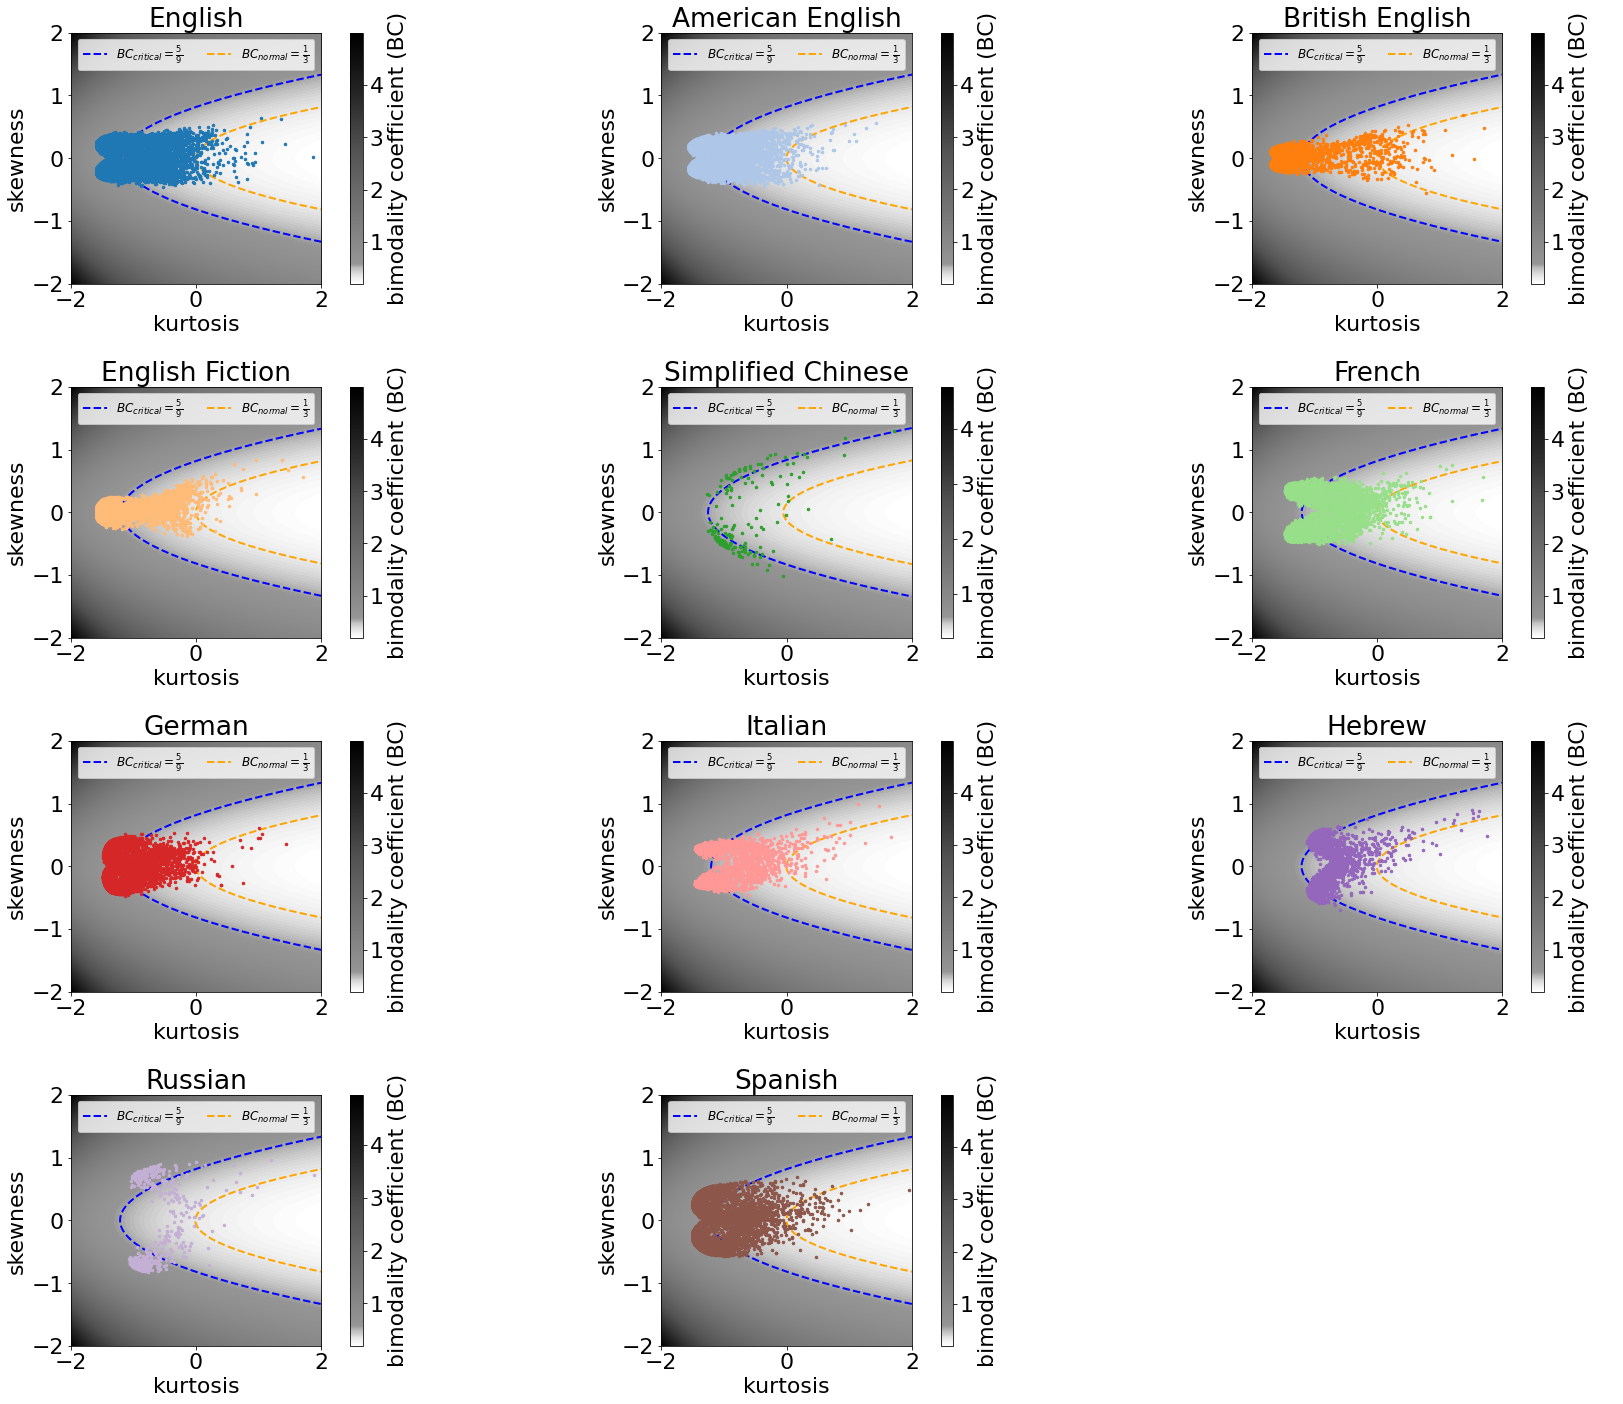

In [16]:
fig, ax = plt.subplots(4,3,figsize=(25,20))
for l in l_codes:
    lp.bimodality_coefficient_plot(data=l_BC[l],title=l_labels[l],grid_size=l_BC[l]['bc'].shape[0],color=mp.colors.to_hex(l_colors[l]),markersize_selected=10,legend=True,colorbar=True,ax=ax[l_plot_grids[l]])
ax[3,2].axis('off')
plt.tight_layout()
plt.savefig('figures/google-ngram-visualizations/bc_global-all_4x3.png')
plt.show()

## 5. Word Relations Network using the CC matrix.

In [6]:
l = 'eng'
pcs = pkl.load(open(precomp_gn_dir+'/pcs_'+l+'.pkl','rb'))
top = 5
bottom = 5
dtype = 'zscore'
D = gn.read('1',l,ignore_case=True,restriction=True,annotation=False)
for k in D.keys():
    try:
         D[k] = D[k].T.sort_index().T
    except:
         pass
Z = D[dtype]

C:\Users\ajavq\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


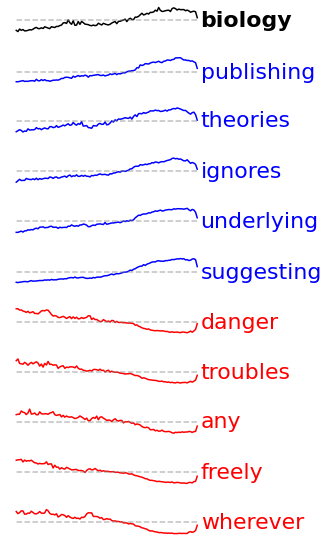

In [11]:
fig, ax = plt.subplots(1,1,figsize=(5,8))
lp.word_relation_time_series_plot('biology',pcs,Z,top=top,bottom=bottom,ax=ax)
plt.tight_layout()
plt.show()

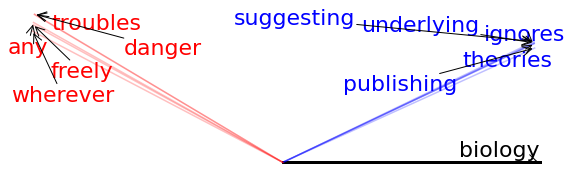

In [8]:
fig, ax = plt.subplots(1,1,figsize=(10,3))
lp.word_relation_network_plot('biology',pcs,top=top,bottom=bottom,ax=ax)
plt.show()

C:\Users\ajavq\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


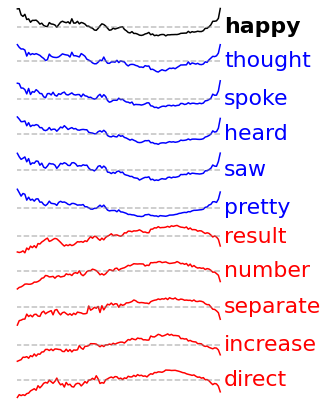

C:\Users\ajavq\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


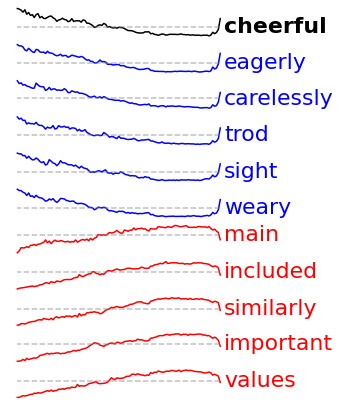

C:\Users\ajavq\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


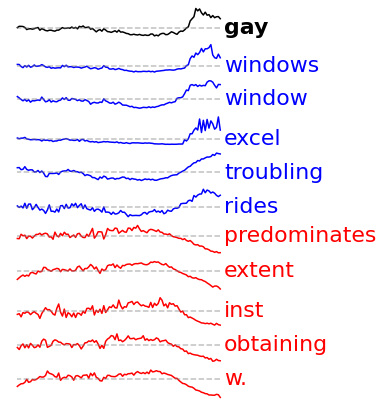

C:\Users\ajavq\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


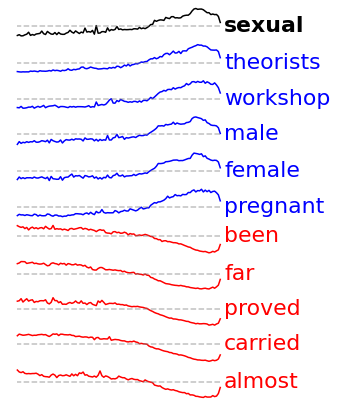

C:\Users\ajavq\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


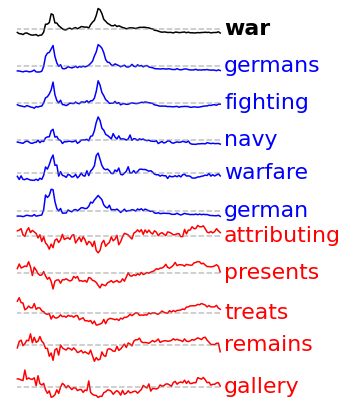

C:\Users\ajavq\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


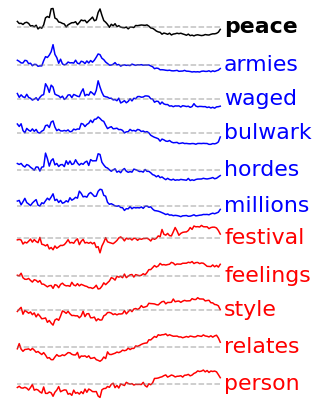

In [23]:
#import matplotlib.gridspec as gridspec
grid = [(0,0),(0,1),(0,2),(1,0),(1,1),(1,2)]
for i, j in enumerate(ngrams_hcgs+ngrams_wp):
    fig, ax = plt.subplots(figsize=(4,8))
    lp.word_relation_time_series_plot(j,pcs,Z,top=top,bottom=bottom,ax=ax)
    plt.savefig('figures/google-ngram-visualizations/'+str(i)+'-wr-pcs-ts-'+j+'.png',bbox_inches="tight")
    plt.show()

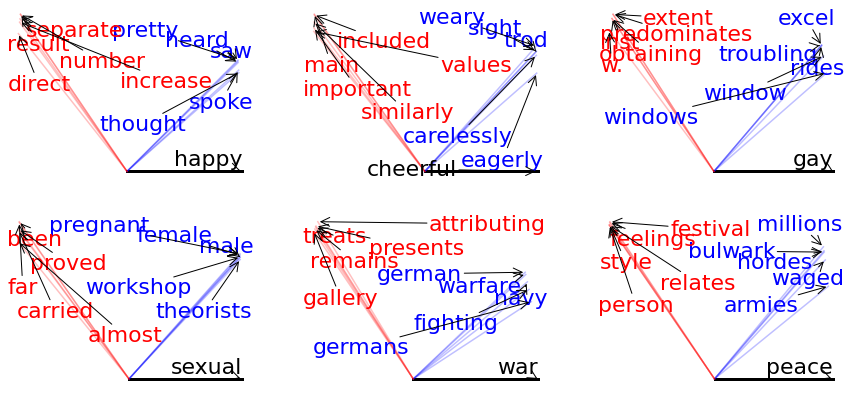

In [16]:
fig, ax = plt.subplots(2,3,figsize=(15,7))
grid = [(0,0),(0,1),(0,2),(1,0),(1,1),(1,2)]
for i, j in enumerate(ngrams_hcgs+ngrams_wp):
    lp.word_relation_network_plot(j,pcs,top=top,bottom=bottom,ax=ax[grid[i]])
plt.show()